In [7]:
from matplotlib.pyplot import *
import yaml
from numpy import *
import numpy as np
import pandas as pd
#from ana_survey import *
#from maptools import *
#from SimMapper import *
from scipy.interpolate import *
#matplotlib.rcParams['figure.figsize'] = (15.0, 12.0)
%matplotlib inline

In [15]:

fa=pd.read_csv("dbplots-1706607573.txt",sep='\s+')


In [23]:
fa["DateTime"]=fa["Date"]+" "+fa["Time"]
fa["DateTime"].dtype
fa1=fa.set_index("DateTime")

In [21]:
fa.head()

,Date,Time,Current,DateTime
0,2023-01-17,11:58:20,0.00003,2023-01-17 11:58:20
1,2023-01-17,11:58:25,0.00003,2023-01-17 11:58:25
2,2023-01-17,11:58:30,0.00003,2023-01-17 11:58:30
3,2023-01-17,11:58:35,0.00003,2023-01-17 11:58:35
4,2023-01-17,11:58:40,0.00003,2023-01-17 11:58:40


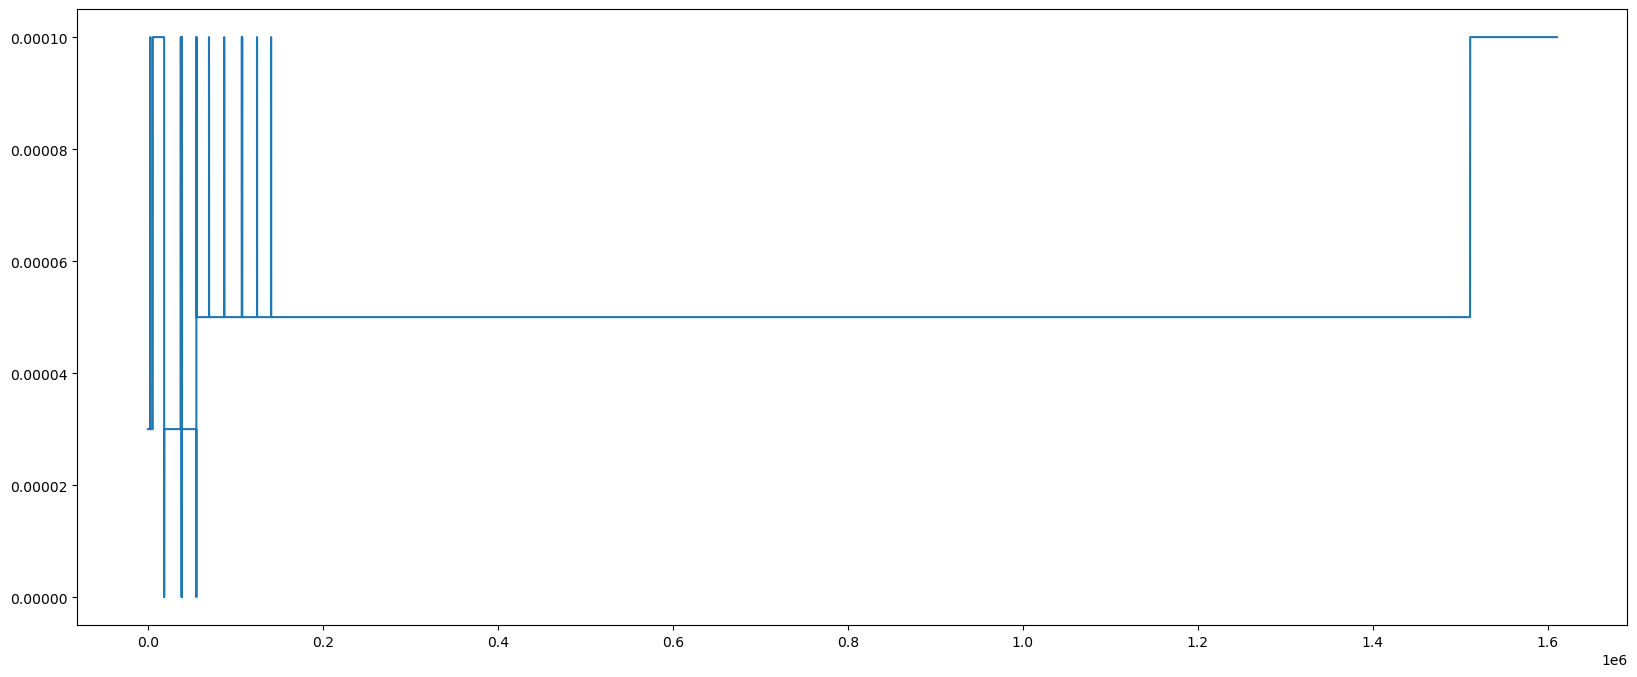

In [25]:
figure(figsize=(20,8))
plot(fa.Current)

In [32]:
fa.head()

,Date,Time,Current,DateTime
0,2023-01-17,11:58:20,0.00003,2023-01-17 11:58:20
1,2023-01-17,11:58:25,0.00003,2023-01-17 11:58:25
2,2023-01-17,11:58:30,0.00003,2023-01-17 11:58:30
3,2023-01-17,11:58:35,0.00003,2023-01-17 11:58:35
4,2023-01-17,11:58:40,0.00003,2023-01-17 11:58:40


In [26]:
tf='%Y-%m-%d %H:%M:%S'

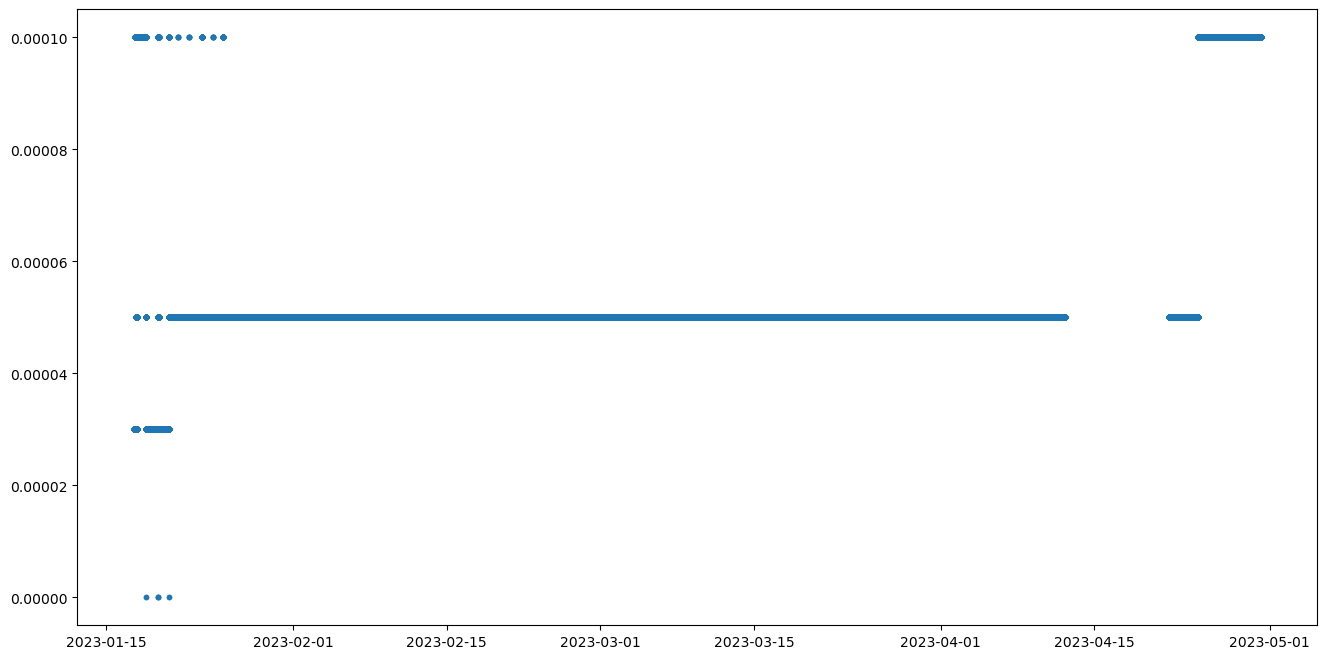

In [31]:
figure(figsize=(16,8))
xt=pd.to_datetime(fa.DateTime, format=tf)
plot(xt,fa.Current,".")

In [13]:
r93=[1,3,6,8,10,11]
r35=[41,44,45,47,48,49,52,53]
r134=[56,57,59,60,62,64,65,66,67,68]

In [22]:
def ConverDate(f):
    timen=[]
    for i in range(len(f)):
        times = datetime.strptime(f.Date[i], '%m/%d/%Y').strftime('%Y-%m-%d')
        timen.append(times)
    f["Date"]=timen   

In [142]:
BS_Ag.head()

,index,Date,Time,Name,Current,DateTime
0,2,2017-08-18,00:00:02,B2_CRYO:CI700_PV,-1.0,2017-08-18 00:00:02
1,3,2017-08-18,00:00:03,B2_CRYO:CI700_PV,-4.0,2017-08-18 00:00:03
2,4,2017-08-18,00:00:04,B2_CRYO:CI700_PV,-1.0,2017-08-18 00:00:04
3,5,2017-08-18,00:00:05,B2_CRYO:CI700_PV,-4.0,2017-08-18 00:00:05
4,7,2017-08-18,00:00:07,B2_CRYO:CI700_PV,-1.0,2017-08-18 00:00:07


In [47]:
# for i in range(len(LER_ESL_Ag)):
#     #if LER_ESL_Ag.Current[i]>300:print LER_ESL_Ag.Current[i]
    
#     if LER_ESL_Ag.Current[i]>400: print LER_ESL_Ag.DateTime[i]

In [48]:
HER_QC2LE_Ag.name

'HER_QC2LE_Ag'

In [49]:
def ConTim2Inx(f, t):
    '''convert the time index to number index'''
    inj=list(f.index.values)
    return inj.index(t)
    
#inj.find("2017-06-21 00:00:01")


In [50]:
def Com_B_C(fB,LER,HER,QCS):
    
    LER["DateTime"]=LER["Date"]+" "+LER["Time"]
    HER["DateTime"]=HER["Date"]+" "+HER["Time"]
    QCS["DateTime"]=QCS["Date"]+" "+QCS["Time"]
    fB["DateTime"]=fB["Date"]+" "+fB["Time"]
            
    LER["DateTime"].dtype
    HER["DateTime"].dtype
    QCS["DateTime"].dtype
    fB["DateTime"].dtype

    timeS=fB["DateTime"][0]
    timeE=fB["DateTime"][len(fB)-1]
    
#     times = datetime.strptime(timeS, '%Y-%m-%d %H:%M:%S:%f').strftime('%Y-%m-%d %H:%M:%S')
#     timee = datetime.strptime(timeE, '%Y-%m-%d %H:%M:%S:%f').strftime('%Y-%m-%d %H:%M:%S')

    LER1=LER[(LER["DateTime"]>timeS)&(LER["DateTime"]<timeE)]
    HER1=HER[(HER["DateTime"]>timeS)&(HER["DateTime"]<timeE)]
    QCS1=QCS[(QCS["DateTime"]>timeS)&(QCS["DateTime"]<timeE)]
    fB1=fB.copy()
    
    LER1=LER1.set_index("DateTime")
    HER1=HER1.set_index("DateTime")
    QCS1=QCS1.set_index("DateTime")
    fB1=fB.set_index("DateTime")
    
    figure(figsize=(20,24))
    subplot(411)
    ax=LER1.Current.plot(style='.')
    #ax.axvline(to_datetime("2017-06-21 13:07:23"))
    title("LER",fontsize=25)
    subplot(412)
    HER1.Current[:].plot(style='.')
    title("HER",fontsize=25)
    subplot(413)
    QCS1.Current[:].plot(style='.')
    title("QC",fontsize=25)
    subplot(414)
    tot(fB1,12).plot(style='.')
    title("Btot sen 12",fontsize=25)
    

In [51]:
#Com_B_C(fj,LER_Ju,HER_Ju,QCS_Ju)

In [52]:
#Com_B_C(fa,LER_Ag,HER_Ag,QCS_Ag)

### Extract each component of the QCS

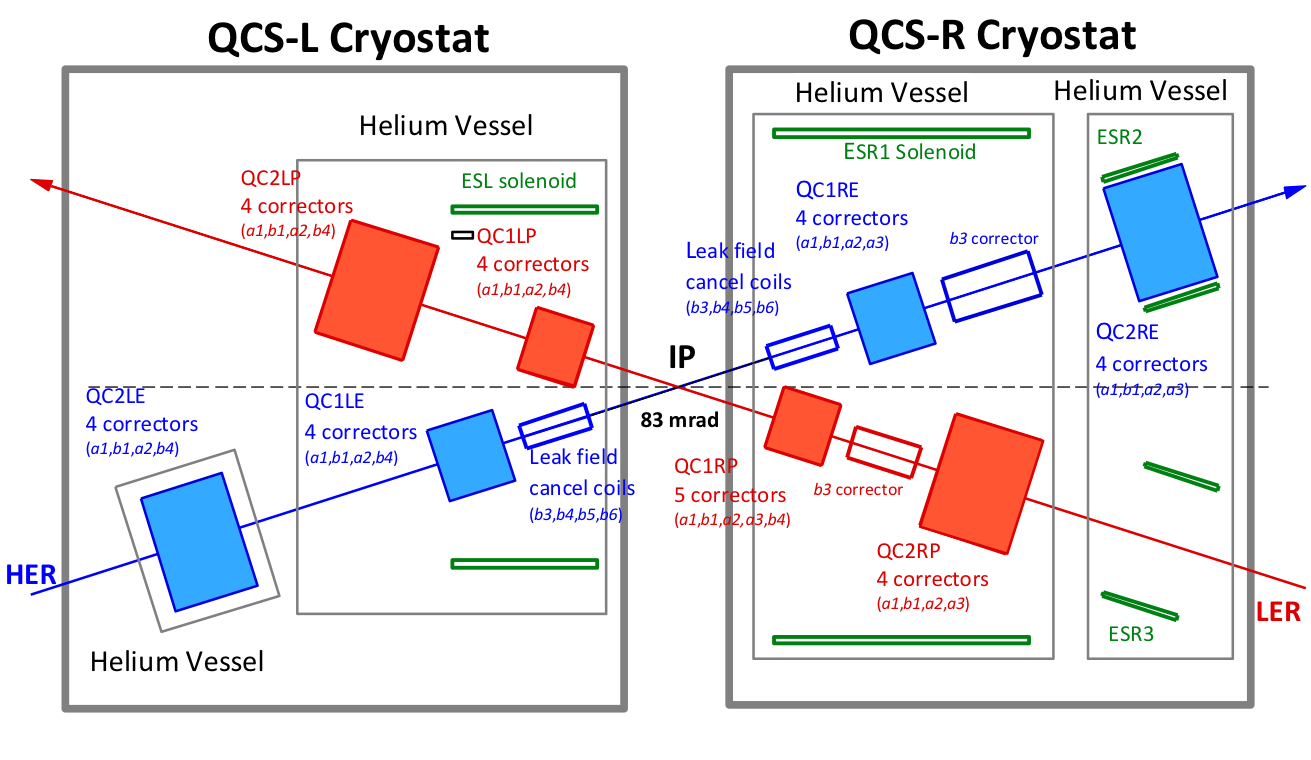

In [53]:
from IPython.display import Image
Image(filename='../Pic/QCS_BELLEII.png')
 

In [148]:
from matplotlib.backends.backend_pdf import PdfPages

def PlotQCS(LF,tf='%Y-%m-%d %H:%M:%S',timeS="2017-08-18 00:00:00",timeE="2017-08-27 23:59:59",
            mark=False,vl=[],la=[],AP=False,sa=False,sd=False):
    
    '''Plot QCS current and gap distribution with respect to time
    parameters:
    LF: list of file
    tf: time formate
    timeS: the start time
    timeE: the end of time
    mark: switch to show the five rotation time periods
    vl: where you want to show a verticle line
    la: label of the verticle line
    AP: switch fo automatic plot all the files listed in the file list
    sa: switch to save the picture
    sd; switch to save the dataframe
    '''
    
        
    if AP:figure(figsize=(20,4*len(LF)))
    
    co=["r","b","y","k","c"]
    
    ind=1
    for f in LF:
        f.DateTime.dtype
        
        fn=f[(f.DateTime>timeS)&(f.DateTime<timeE)]
        
        if AP: subplot(len(LF),1,ind)
        xt=to_datetime(fn.DateTime, format=tf)
        plot(xt,fn.Current,".")
        title(f.name,fontsize=15)
        if mark:
            axvline(to_datetime("2017-08-19 14:41:00"),color="r")
            axvline(to_datetime("2017-08-19 15:52:00"),color="r")

            axvline(to_datetime("2017-08-21 11:42:00"),color="b")
            axvline(to_datetime("2017-08-21 12:50:00"),color="b")

            axvline(to_datetime("2017-08-22 16:25:00"),color="k")
            axvline(to_datetime("2017-08-22 16:51:00"),color="k")

            axvline(to_datetime("2017-08-22 18:13:00"),color="y")
            axvline(to_datetime("2017-08-22 19:09:00"),color="y")

            axvline(to_datetime("2017-08-23 18:58:00"),color="c")
            axvline(to_datetime("2017-08-23 19:47:00"),color="c")

            # for the period without any current
            axvline(to_datetime("2017-08-23 14:00:00"),color="k")
            axvline(to_datetime("2017-08-23 15:00:00"),color="k")

        
        
        ymax=(ylim()[0]+ylim()[1])*0.5
        
        yr=(ylim()[1]-ylim()[0])/15.

        #print ymax
        if len(vl)>0:
            ind2=0
            for s in vl:
                axvline(to_datetime(s),color=co[ind2%5])
                text(to_datetime(s),ymax+yr*ind2, la[ind2])
                ind2=ind2+1
        
        #ylim([400,420])
        ind=ind+1
        
        
        #Save the data to csv file
        if sd: fn.to_csv(f.name+".csv", index=False)

        
        
        
        
    if sa:
        savefig(f.name+".png")
        savefig(f.name+".ps")
        savefig(f.name+".pdf")



    #fd.close()



In [55]:
from matplotlib.backends.backend_pdf import PdfPages
#from psfile import EPSFile

def PlotQCSGAP(LF,tf='%Y-%m-%d %H:%M:%S'):
    #p1d = PdfPages("BelleII_magnet_current.pdf")
    #fd = EPSFile("example.eps", 300, 300)
    
    figure(figsize=(30,4*len(LF)))

    ind=1
    for f in LF:
        #figure(figsize=(30,4))
        subplot(len(LF),1,ind)
        xt=to_datetime(f.DateTime, format=tf)
        plot(xt,f.Current,".")
        title(f.name,fontsize=15)
#         axvline(to_datetime("2017-08-19 14:41:00"),color="r")
#         axvline(to_datetime("2017-08-19 15:52:00"),color="r")

#         axvline(to_datetime("2017-08-21 11:42:00"),color="b")
#         axvline(to_datetime("2017-08-21 12:50:00"),color="b")

#         axvline(to_datetime("2017-08-22 16:25:00"),color="k")
#         axvline(to_datetime("2017-08-22 16:51:00"),color="k")

#         axvline(to_datetime("2017-08-22 18:13:00"),color="y")
#         axvline(to_datetime("2017-08-22 19:09:00"),color="y")

#         axvline(to_datetime("2017-08-23 18:58:00"),color="c")
#         axvline(to_datetime("2017-08-23 19:47:00"),color="c")
        
        ind=ind+1
    savefig(f.name+".png")
        
    #fd.close()



In [56]:
from matplotlib.backends.backend_pdf import PdfPages
#from psfile import EPSFile

def PlotCB(LFC,LFB,tfc='%m/%d/%Y %H:%M:%S',tfb="%m/%d/%Y %H:%M:%S",BL=[1]):
    #p1d = PdfPages("BelleII_magnet_current.pdf")
    #fd = EPSFile("example.eps", 300, 300)
    
    figure(figsize=(30,4*len(LFC)))

    ind=1
    for f in LFC:
        #figure(figsize=(30,4))
        subplot(len(LFC),1,ind)
        xt=to_datetime(f.DateTime, format=tf)
        plot(xt,f.Current,".")
        title(f.name,fontsize=15)
        axvline(to_datetime("2017-08-19 14:41:00"),color="r")
        axvline(to_datetime("2017-08-19 15:52:00"),color="r")

        axvline(to_datetime("2017-08-21 11:42:00"),color="b")
        axvline(to_datetime("2017-08-21 12:50:00"),color="b")

        axvline(to_datetime("2017-08-22 16:25:00"),color="k")
        axvline(to_datetime("2017-08-22 16:51:00"),color="k")

        axvline(to_datetime("2017-08-22 18:13:00"),color="y")
        axvline(to_datetime("2017-08-22 19:09:00"),color="y")

        axvline(to_datetime("2017-08-23 18:58:00"),color="c")
        axvline(to_datetime("2017-08-23 19:47:00"),color="c")
        
        ind=ind+1
    savefig(f.name+".png")
        
    #fd.close()



In [57]:
from matplotlib.backends.backend_pdf import PdfPages

def PlotB(LF,tf='%m/%d/%Y %H:%M:%S',BL=[1],timeS="2017-08-18 00:00:00",timeE="2017-08-29 16:33:00",save=False,mark=True,Ti=True):
    
    '''Plot B field distribution with respect to time
    parameters:
    tf: time formate
    BL: list of sensor you want to look
    timeS: the start time
    timeE: the end of time
    save: switch to save the picture
    mark: switch to show the five rotation time periods
    '''
    
    for f in LF:
        #figure(figsize=(30,4))
        
        f.DateTime.dtype
        
        fn=f[(f.DateTime>timeS)&(f.DateTime<timeE)]
        fn.name=f.name
        
        xt=to_datetime(fn.DateTime, format=tf)
        
        for b in BL:
            plot(xt,gettot(fn,b),"-",label="sen "+str(b))
        
        if Ti:
            title(fn.name,fontsize=15)
        legend(loc=0,ncol=2)
        
        if mark:
            axvline(to_datetime("2017-08-19 14:41:00"),color="r")
            axvline(to_datetime("2017-08-19 15:52:00"),color="r")

            axvline(to_datetime("2017-08-21 11:42:00"),color="b")
            axvline(to_datetime("2017-08-21 12:50:00"),color="b")

            axvline(to_datetime("2017-08-22 16:25:00"),color="k")
            axvline(to_datetime("2017-08-22 16:51:00"),color="k")

            axvline(to_datetime("2017-08-22 18:13:00"),color="y")
            axvline(to_datetime("2017-08-22 19:09:00"),color="y")

            axvline(to_datetime("2017-08-23 18:58:00"),color="c")
            axvline(to_datetime("2017-08-23 19:47:00"),color="c")

        if save: savefig(fn.name+".png")
        
    #fd.close()



In [58]:
def PlotT(LF,tf='%m/%d/%Y %H:%M:%S',BL=[1],timeS="2017-08-18 00:00:00",timeE="2017-08-29 16:33:00",save=False,mark=True):
    
    '''Plot temperture distribution with respect to time
    parameters:
    tf: time formate
    BL: list of sensor you want to look
    timeS: the start time
    timeE: the end of time
    save: switch to save the picture
    mark: switch to show the five rotation time periods
    '''
    
    for f in LF:
        #figure(figsize=(30,4))
        
        f.DateTime.dtype
        
        fn=f[(f.DateTime>timeS)&(f.DateTime<timeE)]
        fn.name=f.name
        
        xt=to_datetime(fn.DateTime, format=tf)
        
        for b in BL:
            plot(xt,fn["Temp"+str(b)],"-",label="sen "+str(b))

        
        title("Temperture "+fn.name,fontsize=15)
        legend(loc=0,ncol=2)
        
        if mark:
            axvline(to_datetime("2017-08-19 14:41:00"),color="r")
            axvline(to_datetime("2017-08-19 15:52:00"),color="r")

            axvline(to_datetime("2017-08-21 11:42:00"),color="b")
            axvline(to_datetime("2017-08-21 12:50:00"),color="b")

            axvline(to_datetime("2017-08-22 16:25:00"),color="k")
            axvline(to_datetime("2017-08-22 16:51:00"),color="k")

            axvline(to_datetime("2017-08-22 18:13:00"),color="y")
            axvline(to_datetime("2017-08-22 19:09:00"),color="y")

            axvline(to_datetime("2017-08-23 18:58:00"),color="c")
            axvline(to_datetime("2017-08-23 19:47:00"),color="c")

        if save: savefig(fn.name+"Temperture.png")
        
    #fd.close()



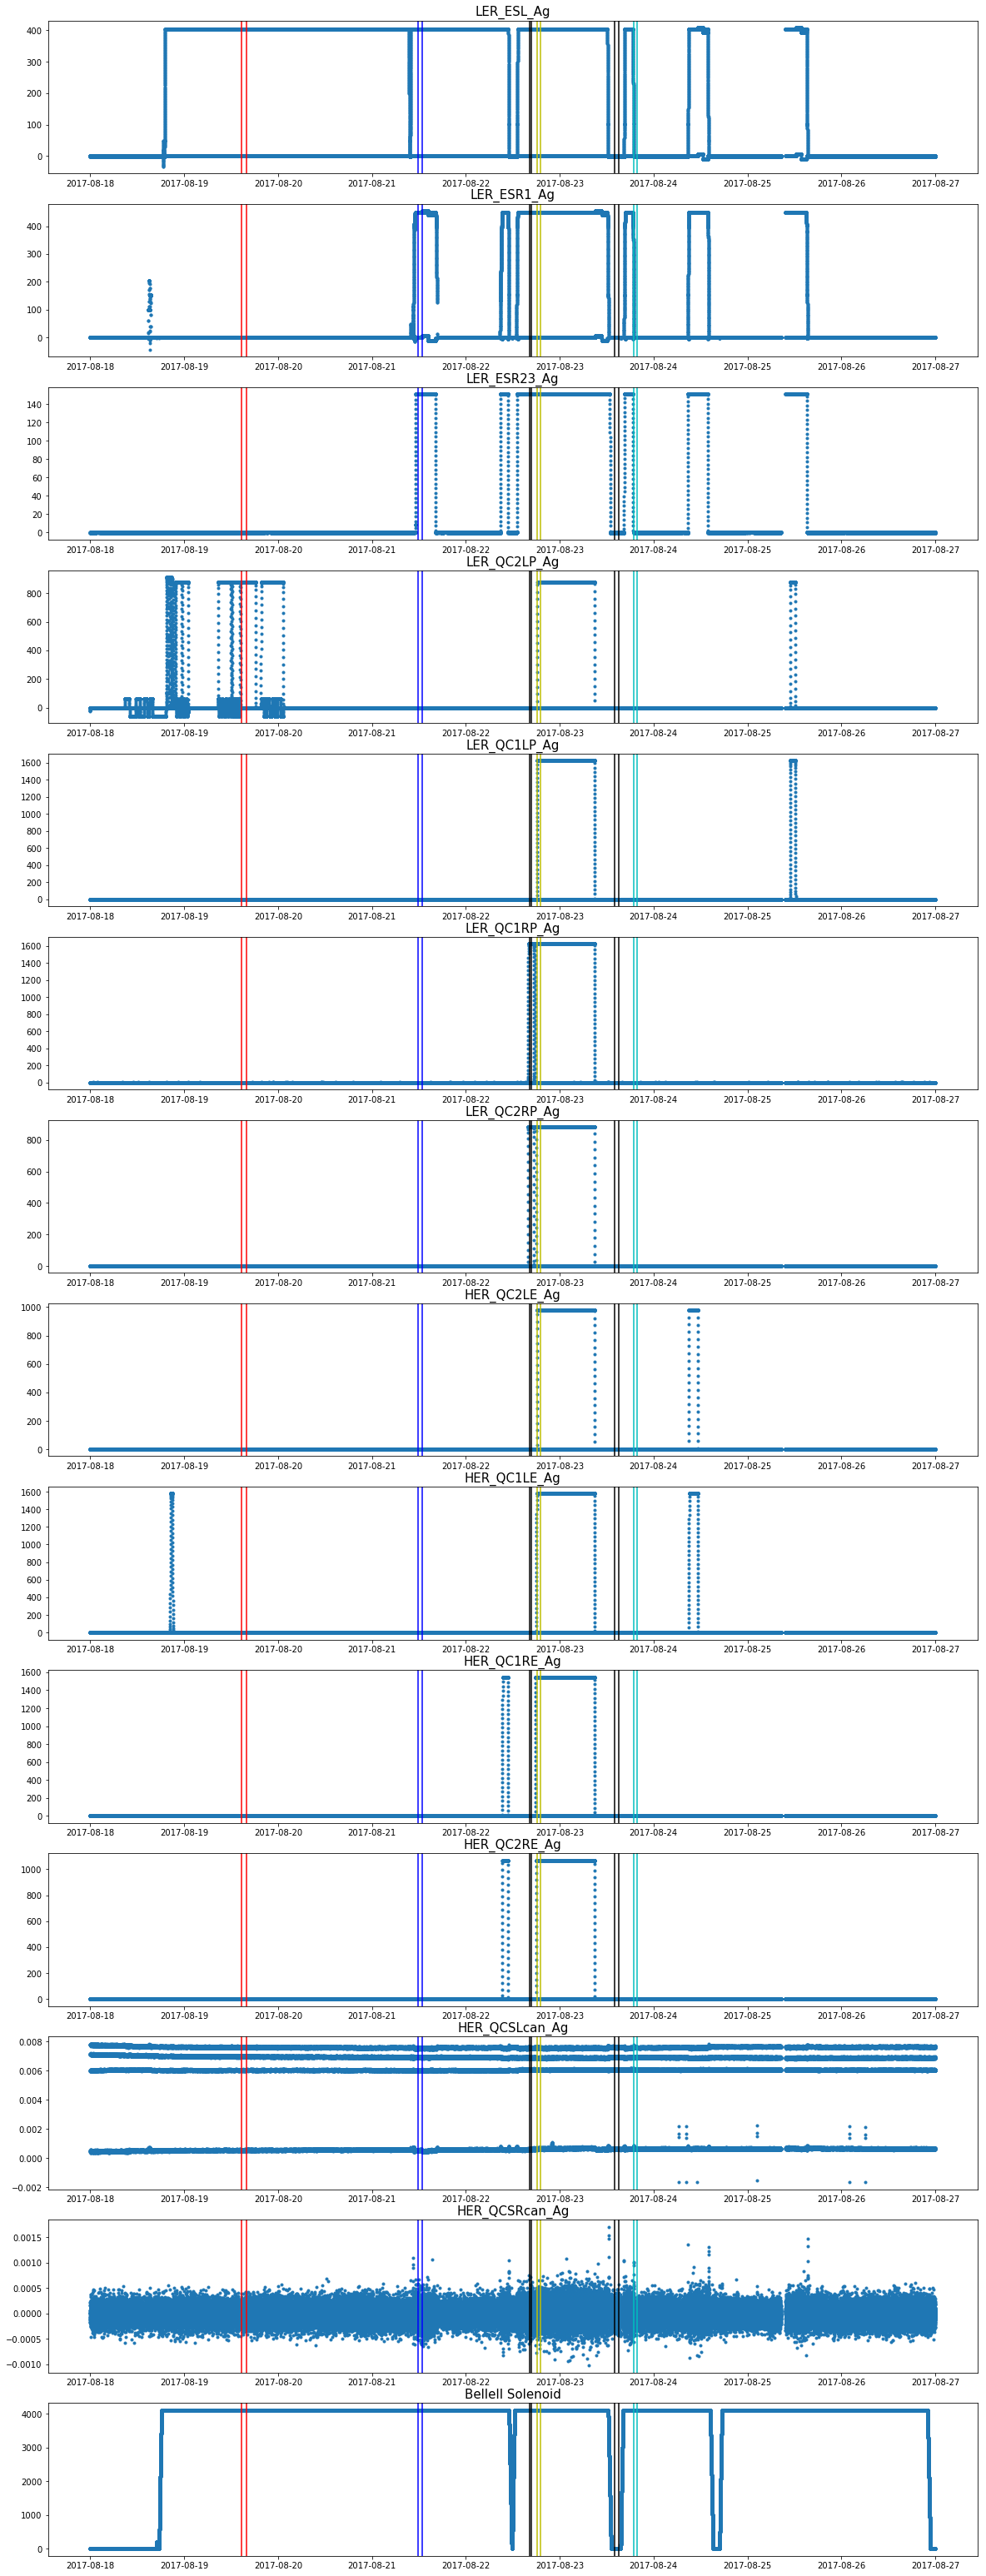

In [59]:
PlotQCS([LER_ESL_Ag,LER_ESR1_Ag,LER_ESR23_Ag,LER_QC2LP_Ag,LER_QC1LP_Ag,LER_QC1RP_Ag,
         LER_QC2RP_Ag,HER_QC2LE_Ag,HER_QC1LE_Ag,HER_QC1RE_Ag,HER_QC2RE_Ag,HER_QCSLcan_Ag,HER_QCSRcan_Ag,BS_Ag],mark=True,AP=True)

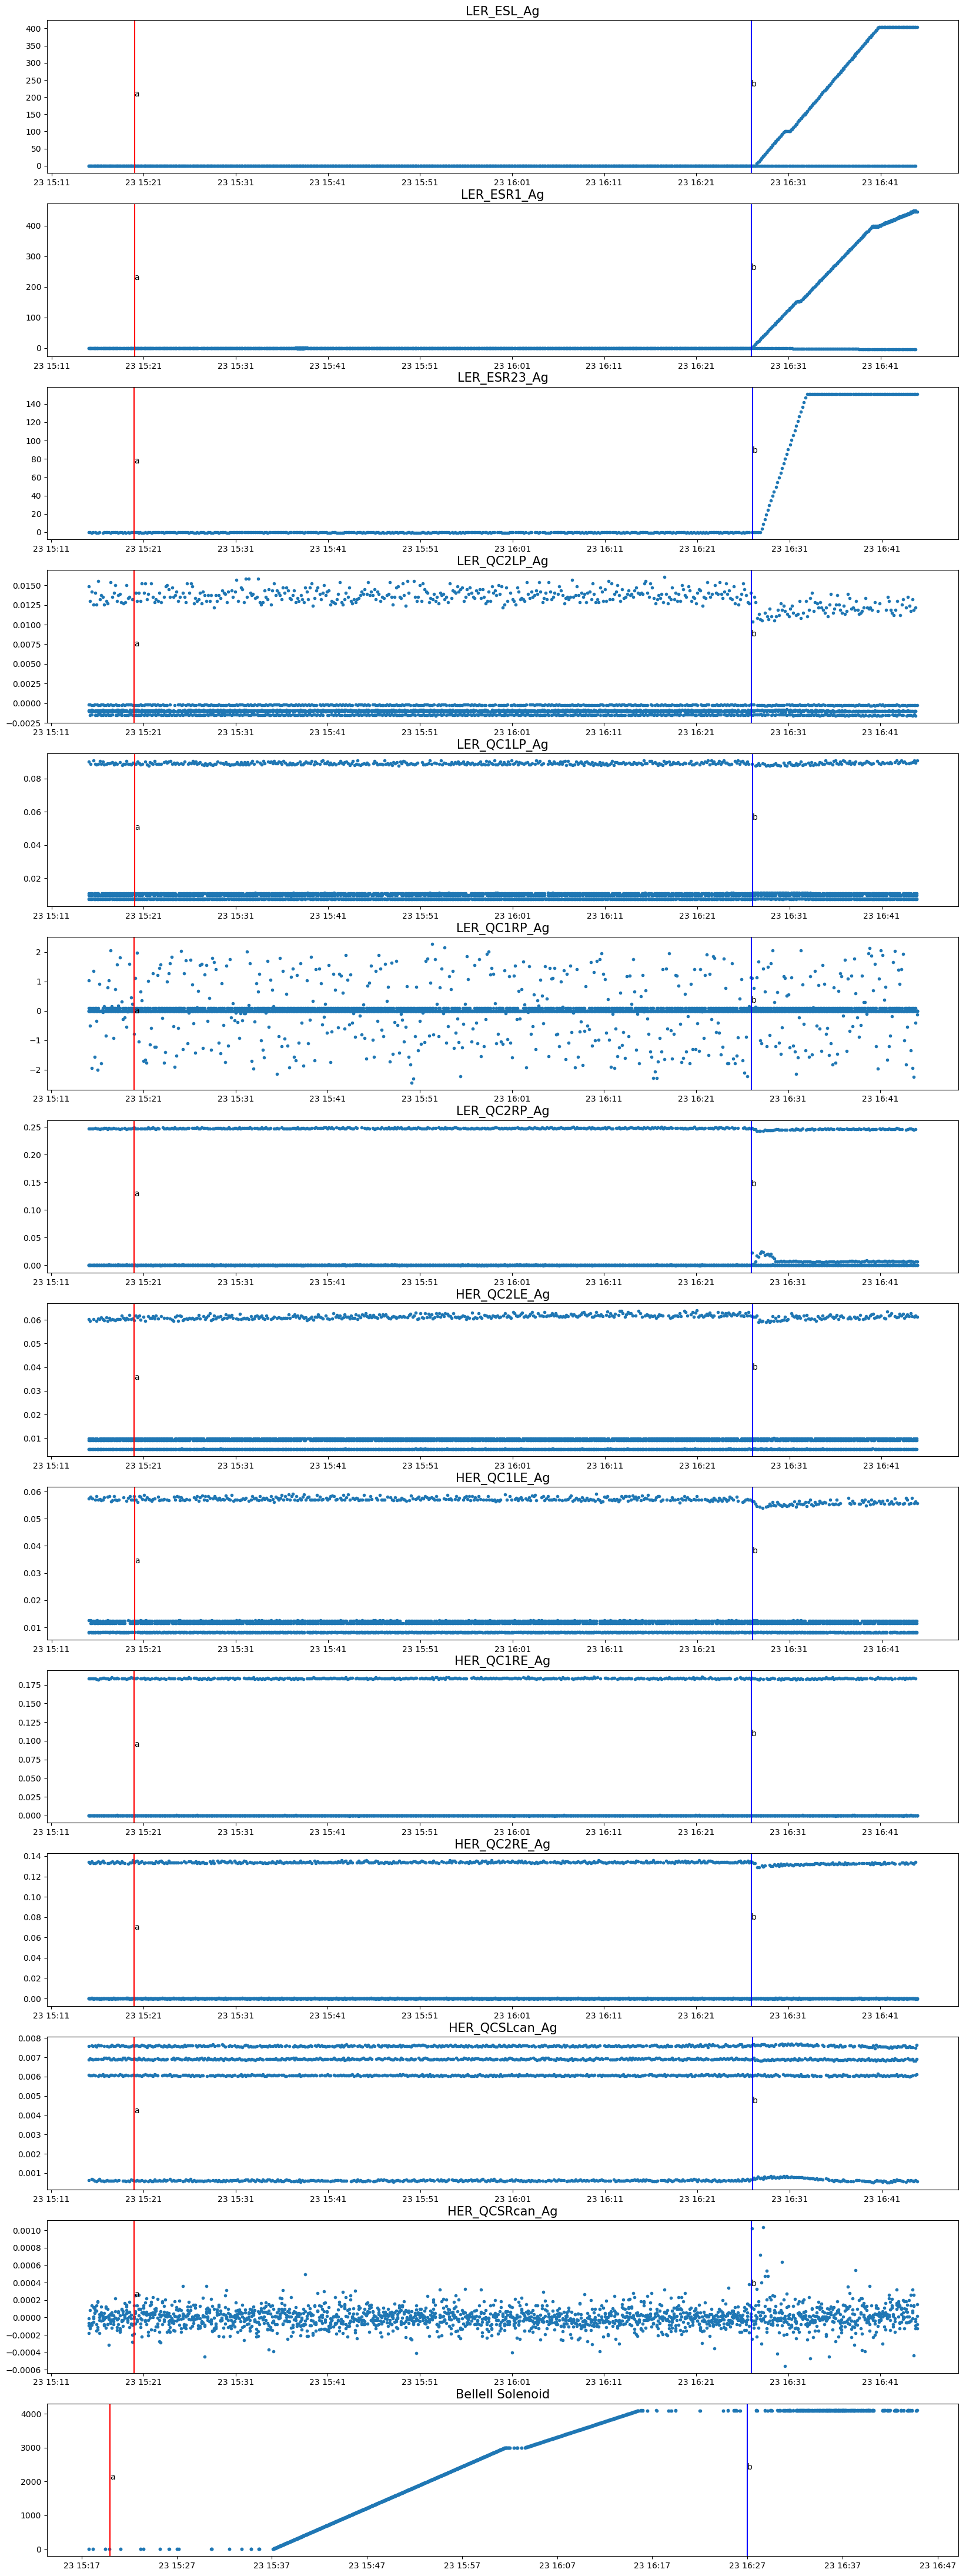

In [141]:
PlotQCS([LER_ESL_Ag,LER_ESR1_Ag,LER_ESR23_Ag,LER_QC2LP_Ag,LER_QC1LP_Ag,LER_QC1RP_Ag,
         LER_QC2RP_Ag,HER_QC2LE_Ag,HER_QC1LE_Ag,HER_QC1RE_Ag,HER_QC2RE_Ag,HER_QCSLcan_Ag,HER_QCSRcan_Ag,BS_Ag],
        timeS="2017-08-23 15:15:00",timeE="2017-08-23 16:45:00",mark=False,AP=True,vl=["2017-08-23 15:20:00","2017-08-23 16:27:00"],la=["a","b"])